# **QUESTION**

What key demographic factors drive individuals’ financial outcomes while  analysing the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda,

# **METRIC FOR SUCCESS**


Identifying the most suitable 1000 target clients to open a bank account per country

# *INTRODUCTION*

**Importing the Libraries**

In [1]:
#importing pandas
import pandas as pd

#importing numpy
import numpy as np

#importing matplotlib
import matplotlib.pyplot as plt

#importing searborn
import seaborn as sns

#import pandas profiling
import pandas_profiling
%matplotlib inline

#import datetime library
from datetime import datetime

**Importing  dataset**

In [2]:
#loading the csv file
df = pd.read_csv("/content/Financial Dataset - 1.csv")


**Checking the Data**

In [3]:
# Determining the no. of records in our dataset
#
df.shape

(16983, 13)

In [4]:
# Previewing the top of our dataset
#
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
16978,Tanzania,2017,uniqueid_2176,Yes,Urban,Yes,1.0,58.0,Male,Head of Household,Single/Never Married,Secondary education,Government Dependent
16979,Tanzania,2017,uniqueid_2177,No,Urban,Yes,1.0,28.0,Male,Head of Household,Single/Never Married,Primary education,Informally employed
16980,Tanzania,2017,uniqueid_2178,No,Urban,Yes,2.0,35.0,Female,Spouse,Single/Never Married,Primary education,Self employed
16981,Tanzania,2017,uniqueid_2179,No,Urban,Yes,3.0,61.0,Male,Head of Household,Single/Never Married,Primary education,Informally employed
16982,Tanzania,2017,uniqueid_2180,Yes,Rural,Yes,5.0,35.0,Female,Head of Household,Widowed,Terti,NaN


In [6]:
#checking for more information our about data set in terms of counts data types etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16983 entries, 0 to 16982
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 16983 non-null  object 
 1   year                    16983 non-null  int64  
 2   uniqueid                16983 non-null  object 
 3   Has a Bank account      16979 non-null  object 
 4   Type of Location        16975 non-null  object 
 5   Cell Phone Access       16979 non-null  object 
 6   household_size          16970 non-null  float64
 7   Respondent Age          16961 non-null  float64
 8   gender_of_respondent    16973 non-null  object 
 9   The relathip with head  16979 non-null  object 
 10  marital_status          16965 non-null  object 
 11  Level of Educuation     16962 non-null  object 
 12  Type of Job             16960 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.7+ MB


In [7]:
#year data type appears as int so change it first to string then to dt format(y-m-d).


df['year'] = df['year'].astype('str')
df['year'] =  pd.to_datetime(df['year'],format='%Y-%m-%d')

df.dtypes
#year datatypes shoud be changed to datetime now.should appear as datetime 

country                           object
year                      datetime64[ns]
uniqueid                          object
Has a Bank account                object
Type of Location                  object
Cell Phone Access                 object
household_size                   float64
Respondent Age                   float64
gender_of_respondent              object
The relathip with head            object
marital_status                    object
Level of Educuation               object
Type of Job                       object
dtype: object

**Data cleaning**

In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
# checking for Missing Data
#
df.isnull().sum()

country                    0
year                       0
uniqueid                   0
Has a Bank account         4
Type of Location           8
Cell Phone Access          4
household_size            13
Respondent Age            22
gender_of_respondent      10
The relathip with head     4
marital_status            18
Level of Educuation       21
Type of Job               23
dtype: int64

In [10]:
#dropping all the rows missing the country simply because we are trying to analyse the state of financial inclusion per country
df.dropna(subset =['country'], inplace = True)
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16978,Tanzania,2017-01-01,uniqueid_2176,Yes,Urban,Yes,1.0,58.0,Male,Head of Household,Single/Never Married,Secondary education,Government Dependent
16979,Tanzania,2017-01-01,uniqueid_2177,No,Urban,Yes,1.0,28.0,Male,Head of Household,Single/Never Married,Primary education,Informally employed
16980,Tanzania,2017-01-01,uniqueid_2178,No,Urban,Yes,2.0,35.0,Female,Spouse,Single/Never Married,Primary education,Self employed
16981,Tanzania,2017-01-01,uniqueid_2179,No,Urban,Yes,3.0,61.0,Male,Head of Household,Single/Never Married,Primary education,Informally employed


In [11]:
#dropping the uniqueid coloumn because is not needed in what we are trying to investigate
df.head(3)
df.drop(['uniqueid'],axis = 1,inplace =True)
#unique id dropped

In [12]:
df.head(3)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [13]:
# Checking for unique values in each column
df
print('country')
print(df['country'].unique())

print('years')
print(df['year'].unique())

print('bank account')
print(df['Has a Bank account'].unique())

print('level of education')
print(df['Level of Educuation'].unique())

print('SEX')
print(df['gender_of_respondent'].unique())

print('Location')
print(df['Type of Location'].unique())

country
['Kenya' 'Rwanda' 'Tanzania']
years
['2018-01-01T00:00:00.000000000' '2029-01-01T00:00:00.000000000'
 '2056-01-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2039-01-01T00:00:00.000000000' '2017-01-01T00:00:00.000000000']
bank account
['Yes' 'No' nan]
level of education
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6' nan 'Terti']
SEX
['Female' 'Male' nan]
Location
['Rural' 'Urban' nan]


In [14]:
#anormalies in the year column i.e we have years 2039,2056 and 2029
#dropping these years therefore

# Drop future year data
dropped_years = df[df['year'].isin([2029,2056,2039])].index
df.drop(index=dropped_years, inplace=True)

In [15]:
# Drop incorrect education data
drop_education = df[df['Level of Educuation']== '6'].index
df.drop(index=drop_education, inplace=True)

# **Univariate Analysis**

*Age*

In [16]:
# Describing our numerical variables
df[['Respondent Age']].describe()
#using the describe function to get the mean ,max,min ,std and percentile of the variable

,Respondent Age
count,16941.000000
mean,39.257246
std,16.638462
min,16.000000
25%,26.000000
50%,35.000000
75%,50.000000
max,100.000000


In [17]:
 #median
df["Respondent Age"].median()
#this also the 50th percentile from above

35.0

In [18]:
 #mode
 df["Respondent Age"].mode()

0    30.0
dtype: float64

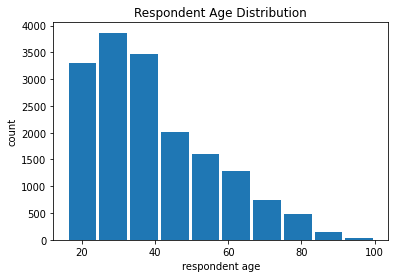

In [19]:
# age distribution of respondent
plt.hist('Respondent Age', bins=10, histtype='bar',rwidth=0.9,data=df)

plt.xlabel('respondent age')
plt.ylabel('count')
plt.title('Respondent Age Distribution') 
plt.show()

In [20]:
#skewness

df["Respondent Age"].skew()

0.8048710528167595

the age variable data is positively skewed to the right

In [21]:
#kurtosis
df["Respondent Age"].kurt()

0.014209480192739932

The age variable data is platykurtic because kurtosis is less than that of a normal distribution hence no outliers

*Household_size*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


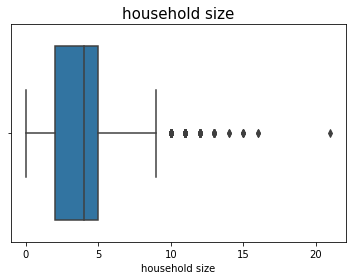

In [22]:

sns.boxplot(df['household_size'])
#labelling x and y axis
plt.xlabel('household size')


#giving a title
plt.title('household size',fontsize = 15)
#showing our graph
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Household Size Distribution')

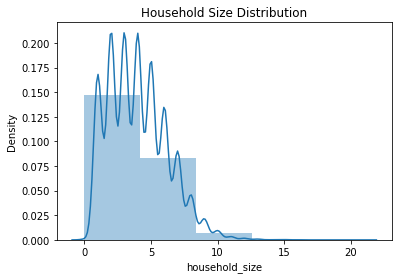

In [23]:
sns.distplot(df['household_size'], bins=5)
plt.title('Household Size Distribution')



In [24]:
# skewness
df['household_size'].skew()

0.6660924428204492

In [25]:
# Check for kurtosis
df['household_size'].kurt()

0.43504052928500014

Household variable has a positive skewness to the right. The distribution is also leptokurtic thus presence of outliers, which is also supoorted by the above box plot


In [26]:
# Challenging our outliers in houdehold size variable using the interquatile range 


outlier_df = df[['household_size']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df2__outlier = df[~((outlier_df < (Q1 - 1.5 * IQR)) | (outlier_df > (Q3 + 1.5 * IQR))).any(axis = 1)]
index = df2__outlier[df2__outlier.values == True].index
df[df.index.isin(index)].head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # Remove the CWD from sys.path while we load stuff.


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
7,Kenya,2018-01-01,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
16,Kenya,2018-01-01,No,Urban,Yes,1.0,47.0,Female,Head of Household,Married/Living together,Secondary education,Self employed
18,Kenya,2018-01-01,No,Urban,Yes,1.0,48.0,Female,Head of Household,Single/Never Married,Vocational/Specialised training,Formally employed Private
21,Kenya,2018-01-01,Yes,Urban,Yes,1.0,32.0,Male,Head of Household,Single/Never Married,Vocational/Specialised training,Self employed
27,Kenya,2018-01-01,No,Urban,Yes,1.0,31.0,Female,Head of Household,Single/Never Married,Primary education,Informally employed


The above rows appears as outliers in the household size column , i will not be dropping the the said values because the data size is significantly large and dropping these many rows will interfere with the findings.Lastly i believe the ouliers are a result of variation in our dataset and not because they were wrongly measured or recorded.

Text(0.5, 0, 'gender')

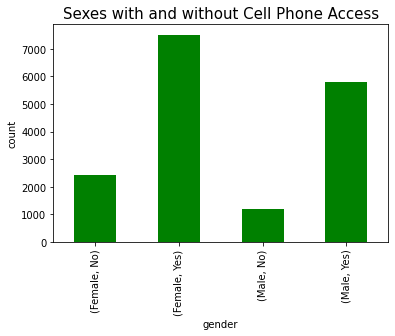

In [27]:

Respondents = df.groupby(['gender_of_respondent', 'Cell Phone Access'])['Cell Phone Access'].count()
Respondents.plot(kind = 'bar', color='green')
plt.title('Sexes with and without Cell Phone Access', fontsize = 15)
#Labelling our y axis
plt.ylabel('count')
plt.xlabel('gender')

In [28]:
#proportion of individuals with or without bank accounts
df['Has a Bank account'].value_counts(normalize=True)*100
#proportion we look for percentage thats why *100

No     83.937732
Yes    16.062268
Name: Has a Bank account, dtype: float64

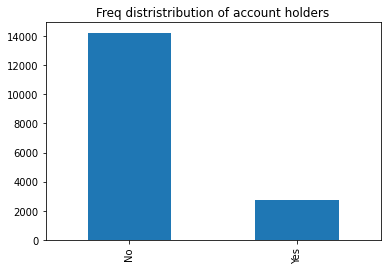

In [29]:
#visualisation of account holders count.
df['Has a Bank account'].value_counts().plot.bar(title='Freq distristribution of account holders', )


from the above plot we see  there are more people without accounts than those who have hence financial inclusion in these 4 countries is still in its all time low

# ***Bivariate Analysis***

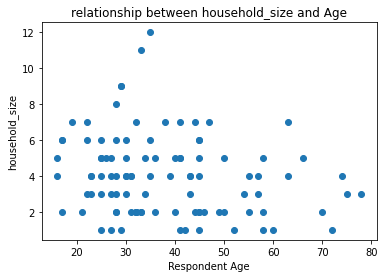

In [30]:
#between numerical variables
# Using Pandas: Plotting our scatterplot to compare the variables
#plotted using a sample to avoid over laps
plt.scatter(df['Respondent Age'].sample(100),df['household_size'].sample(100))
#tile
plt.title('relationship between household_size and Age')
plt.xlabel('Respondent Age')
plt.ylabel('household_size')
plt.show()


In [31]:
#Correlation
#statistical measure that describes the association between random variables.

# Calculating the pearson coefficient

pearson_coeff = df["Respondent Age"].corr(df["household_size"], method="pearson") 
print(pearson_coeff)

-0.1540474744149345


There is a weak negative correlation between age and household size

In [32]:
#Between Categorical Varibles
#investigating location and if respondent has bank account or not
location_df = pd.crosstab(df['Has a Bank account'], df['Type of Location'])
location_df

Type of Location,Rural,Urban
Has a Bank account,,
No,10263,3968
Yes,1347,1377


in general there are more people without accounts than those who have irregardless of location however the rural locations has a significant percent of ppl without back accounts

In [33]:
#investigating gender and if respondent has bank account or not
gender_df = pd.crosstab(df['Has a Bank account'], df['gender_of_respondent'])
gender_df

gender_of_respondent,Female,Male
Has a Bank account,,
No,8732,5494
Yes,1219,1504


Text(0.5, 0, 'Has a bank account')

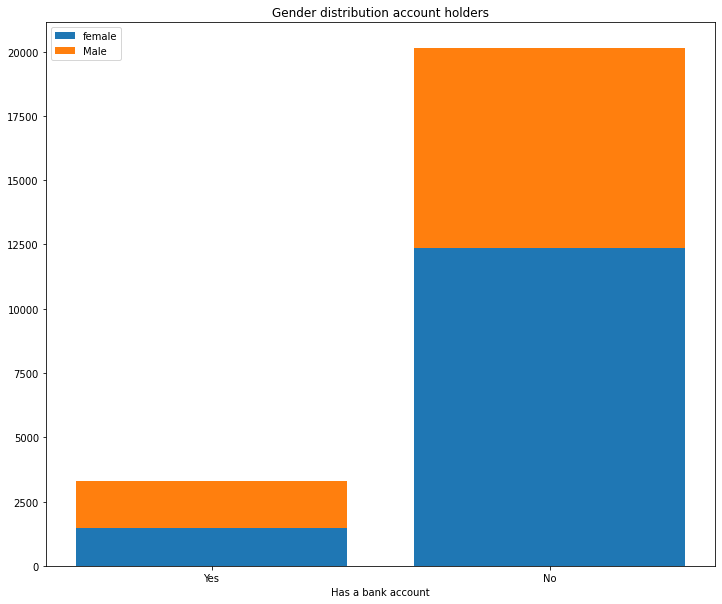

In [34]:
#using stackcolumns
account_holders = ['Yes', 'No']
female = [1482, 12346]
male = [1823, 7789]
x = [status for status in account_holders]
plt.figure(figsize=(12,10))
plt.bar(x, female, label='female')
plt.bar(x, male, label='Male', bottom=female)
plt.title('Gender distribution account holders')
plt.legend()
plt.xlabel('Has a bank account')

# **Multivariable Analysis**

<function matplotlib.pyplot.legend>

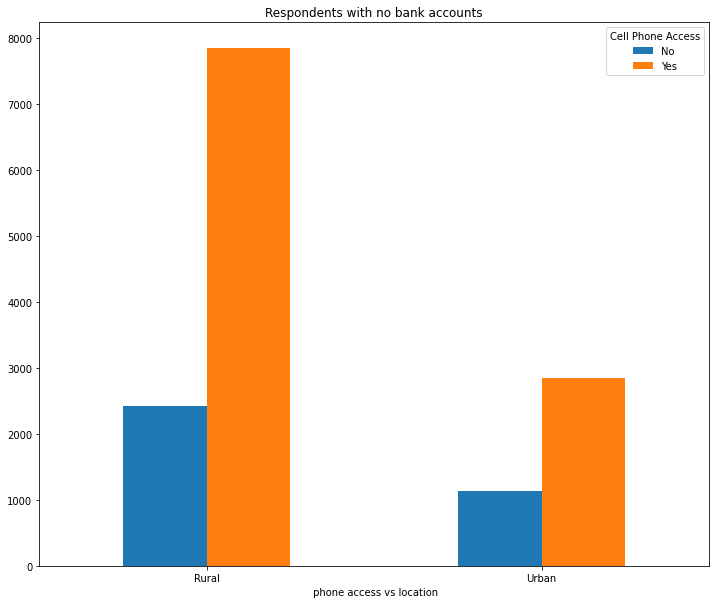

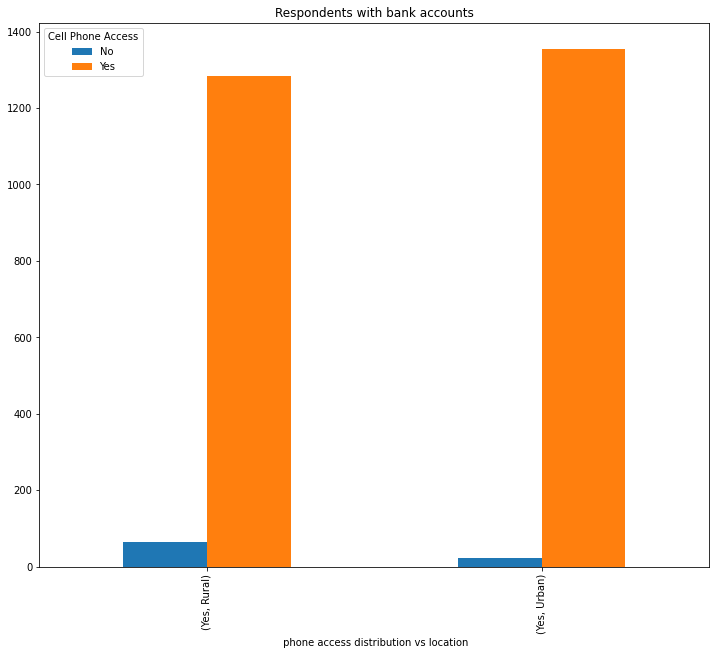

In [35]:
#  cellphone access vs location vs bank account status
phone = pd.crosstab(index=[df['Has a Bank account'],df['Type of Location']], columns=df['Cell Phone Access'])
#plotting our graph
phone.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10),)
#labelling x axis
plt.xlabel(' phone access vs location')
#labelling title
plt.title('Respondents with no bank accounts')
plt.legend


#WITH ACCOUNTS
plt.xticks([0,1], labels=['Rural','Urban'], rotation=0)
phone.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
##labelling x axis
plt.xlabel(' phone access distribution vs location')
plt.title('Respondents with bank accounts')
plt.legend

Majority of respondents with bank accounts have access to cell phones regardless of the location

Text(0.5, 1.0, 'Respondents with bank accounts')

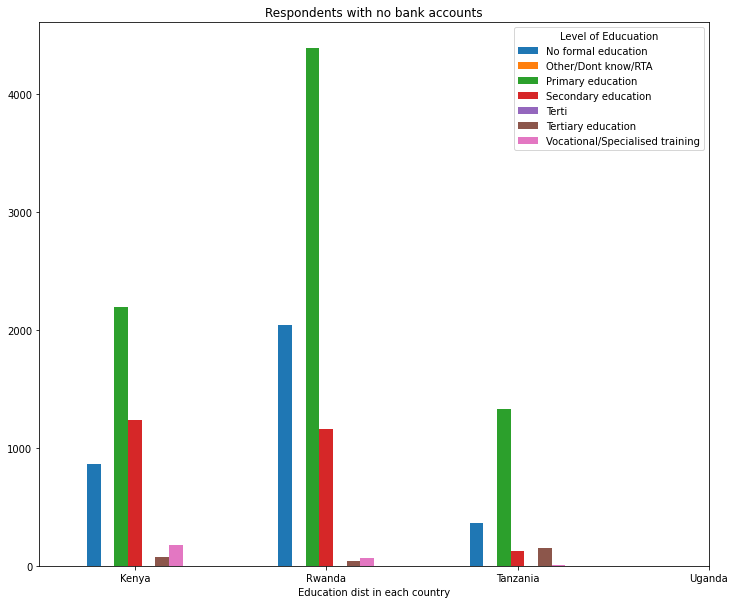

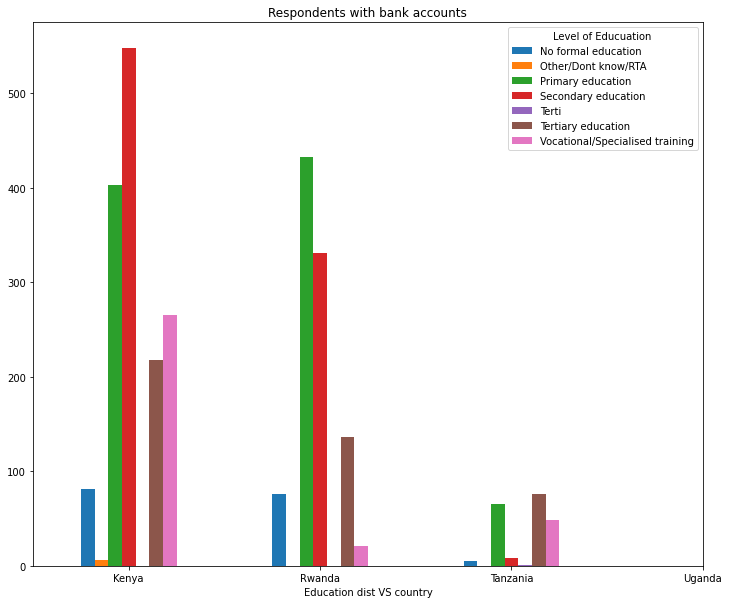

In [36]:
# country vs level of education vs  account holder or not
countryed = pd.crosstab(index=[df['Has a Bank account'],df['country']], columns=df['Level of Educuation'])

#NO BANK ACCOUNTS
countryed.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
#ploting
plt.xlabel('Education dist in each country')
plt.title('Respondents with no bank accounts')
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
#WITH ACCOUNTS
countryed.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education dist VS country')
plt.title('Respondents with bank accounts')

Majority of respondents with no bank account accross the 4 countries have a primary level of education
kenya has the highest number of respondents with bank accounts in terms of respondents who's level of education wis secondary

In [37]:
df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# ***Discriminant Analysis***

In [46]:
#we will use the LDA because our independent variable is categorical
#dividing the dataset into a feature set and corresponding labels

x = df.drop(['country','year','Has a Bank account'], 1).values
y = df['Has a Bank account'].values

x


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


array([['Rural', 'Yes', 3.0, ..., 'Married/Living together',
        'Secondary education', 'Self employed'],
       ['Rural', 'No', 5.0, ..., 'Widowed', 'No formal education',
        'Government Dependent'],
       ['Urban', 'Yes', 5.0, ..., 'Single/Never Married',
        'Vocational/Specialised training', 'Self employed'],
       ...,
       ['Urban', 'Yes', 2.0, ..., 'Single/Never Married',
        'Primary education', 'Self employed'],
       ['Urban', 'Yes', 3.0, ..., 'Single/Never Married',
        'Primary education', 'Informally employed'],
       ['Rural', 'Yes', 5.0, ..., 'Widowed', 'Terti', nan]], dtype=object)

In [53]:
 #Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
# performing Feature scaling
# 


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Peforming LDA

#importing LinearDiscriminantAnalysis class  as LDA. 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#passing  the value for the n_components parameter of the LDA as one since we first want to check the performance 
# of our classifier with a single linear discriminant. 
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(y_test)

In [ ]:

# using the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
#Evaluating the Performance with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
